In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1-Read the dataset to the python environment.

In [235]:
data=pd.read_excel(r'C:\DSA\SUPERVISED LEARNING\iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [236]:
data.shape

(150, 5)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2-Do necessary pre-processing steps.

In [238]:
#Check the presence of missing values in the data set

In [239]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [240]:
# There are missing values in SL,SW and PL data set

In [241]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [242]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [243]:
#Handle missing values in SL,SW AND PL

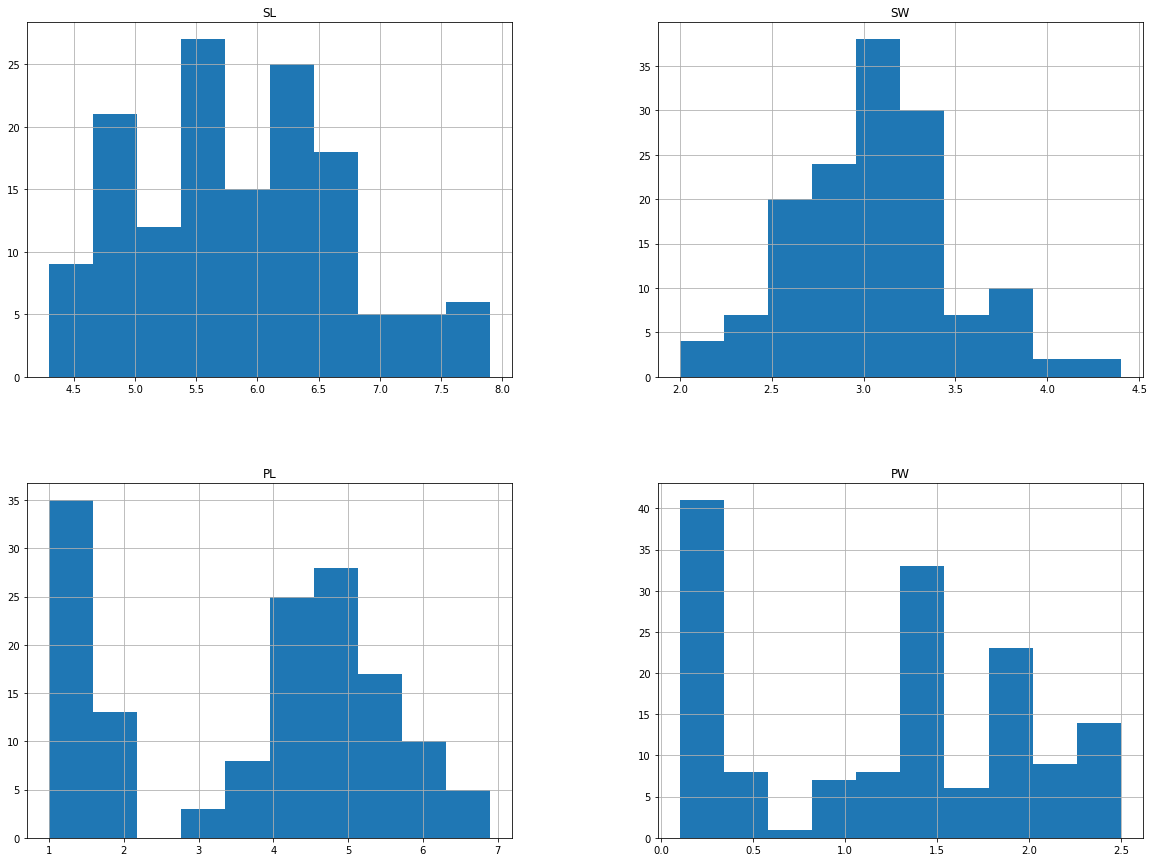

In [244]:
graph=data.select_dtypes(include=['float'])
graph.hist(figsize=(20,15))
plt.show()

In [245]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [246]:
# Take mean to fill the data

In [247]:
for i in["SL",'SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [248]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [249]:
# All the missing values are filled with mean .

# 3-Find out which classification model gives the best result to predict iris species.(also do random forest algorithm



In [250]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [251]:
data["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [252]:
#SPLITTING THE DATA SET

In [287]:
y=data['Classification']
X=data.drop(['Classification'],axis=1)

In [295]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [296]:
X_train.shape

(120, 4)

In [297]:
#LOGISTIC REGRESSION

In [398]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [399]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [402]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9333333333333333
Precision_score: 0.9212962962962963
Recall_score: 0.9345238095238096
f1_score: 0.9263798111837328


In [403]:
#KNN

In [397]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [348]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

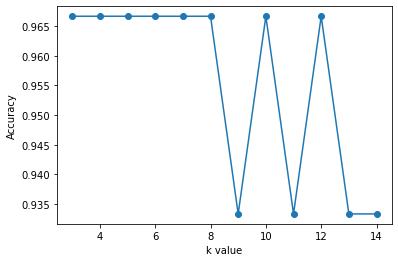

In [349]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel("Accuracy")

In [420]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [421]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9666666666666667
Precision_score: 0.9629629629629629
Recall_score: 0.9761904761904763
f1_score: 0.9680464778503994


In [422]:
#SVM-LINEAR

In [416]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred=svm_linear.predict(X_test)

In [418]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9666666666666667
Precision_score: 0.9629629629629629
Recall_score: 0.9583333333333334
f1_score: 0.9581699346405229


In [362]:
#SVM-POLYNOMEAL

In [431]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train, y_train)
y_pred=svm_poly.predict(X_test)

In [433]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9666666666666667
Precision_score: 0.9629629629629629
Recall_score: 0.9583333333333334
f1_score: 0.9581699346405229


In [434]:
# SVM-RADIAL

In [438]:
svm_radi=SVC(kernel='rbf')
svm_radi.fit(X_train, y_train)
y_pred=svm_radi.predict(X_test)

In [439]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9333333333333333
Precision_score: 0.9212962962962963
Recall_score: 0.9345238095238096
f1_score: 0.9263798111837328


In [335]:
# DECISION TREE

In [451]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [452]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred=dt_model.predict(X_test)

In [453]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))


Accuracy is: 0.9333333333333333


In [456]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9333333333333333
Precision_score: 0.9166666666666666
Recall_score: 0.9166666666666666
f1_score: 0.9166666666666666


Based on F1_Score and accuracy, K.Nearest Neighbour model is the best fit model for classification.

In [380]:
#RANDOM FOREST CLASSIFIER

In [458]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [460]:
print( "Accuracy is:", accuracy_score(y_test,y_pred))
print( "Precision_score:", precision_score(y_test,y_pred,average='macro'))
print( "Recall_score:", recall_score(y_test,y_pred,average='macro'))
print( "f1_score:", f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9666666666666667
Precision_score: 0.9629629629629629
Recall_score: 0.9583333333333334
f1_score: 0.9581699346405229


Accuracy and F1_score of Random Forest Model Classifer model is 0.9666 and 0.9581 respectively